In [1]:
import os, glob
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
N = 5 # Number of experiments
LAYER_RANGE = (1, 2, 3, 4)
LAYER_SETTINGS = len(LAYER_RANGE)
UNIT_RANGE = (100, 150, 200, 250, 300)
UNIT_SETTINGS = len(UNIT_RANGE)

results = {i:{j: {
    'accuracy': np.zeros(N), 
    'f1': np.zeros(N), 
    'memory_fit': np.zeros(N),
    'time_fit': np.zeros(N),
    'memory_predict': np.zeros(N),
    'time_predict': np.zeros(N)
} for j in UNIT_RANGE} for i in LAYER_RANGE}

fields = list(results[1][100].keys())

for file in glob.glob(os.path.join('experiments', 'ffnn', '*')):
    if ('validation' not in file) or (file.endswith('.npy')):
        continue
    else:
        name = os.path.basename(file)
        config, repeat = name.split(' validation ')
        repeat = int(repeat)
        n_layers, n_units = config.split(' ')
        n_layers, n_units = int(n_layers[:-6]), int(n_units[:-5])
        with open(file, 'r') as f:
            for line in f:
                key, value = line.strip('\n').split(': ')
                if key in fields:
                    results[n_layers][n_units][key][repeat] = float(value)

In [3]:
def plot(results, field, xlabel, ylabel, ylim=None, figsize=None, legend_pos=None, cmap=None):
    fig, ax = plt.subplots(figsize=figsize)
    
    if cmap == 'r':
        colors = ['#be2f2f', '#e25049', '#ff7064', '#ff9081', '#ffb09f'][::-1]
    elif cmap == 'g':
        colors = ['#a3d3a7', '#5eb469', '#2f8740', '#005d19', '#003400']
    else:
        colors = ['#8ccde3', '#61a2b7', '#34798d', '#005265', '#002e40']
    
    x_pos = np.arange(LAYER_SETTINGS)
    width = 0.15
    
    bars = []
    
    for i, n_units in enumerate(UNIT_RANGE):
        means = np.zeros(LAYER_SETTINGS)
        errors = np.zeros(LAYER_SETTINGS)
        
        for j, n_layers in enumerate(LAYER_RANGE):
            data = results[n_layers][n_units][field]
            means[j] = np.mean(data)
            errors = np.std(data) / np.sqrt(N)
            
        bars.append(ax.bar(x_pos + width*i - 2*width, means, width, yerr=errors, align='center', alpha=0.9, color=colors[i], ecolor='black', capsize=10, error_kw=dict(lw=1, capsize=3, capthick=1)))
    
    labels = [str(i) for i in LAYER_RANGE]
    
    # Build the plot
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_ylim(ylim)
    
    lgd = ax.legend([b[0] for b in bars], UNIT_RANGE, title='Number of units\n     (per layer)', loc='upper right', bbox_to_anchor=legend_pos)

    # Save the figure and show
#     plt.tight_layout()
    fig.savefig('{}.pdf'.format(field), bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()

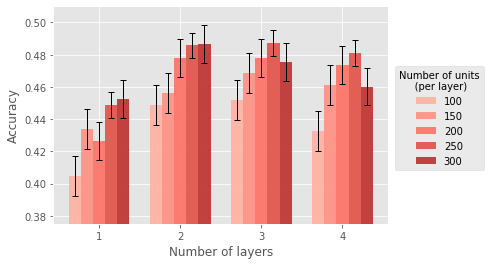

In [4]:
plot(results, 'accuracy', 'Number of layers', 'Accuracy', ylim=(0.375, 0.51), cmap='r', legend_pos=(1.3, 0.75))

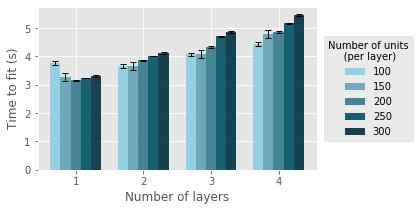

In [5]:
plot(results, 'time_fit', 'Number of layers', 'Time to fit (s)', figsize=(5, 3), cmap='b', legend_pos=(1.362, 0.85))

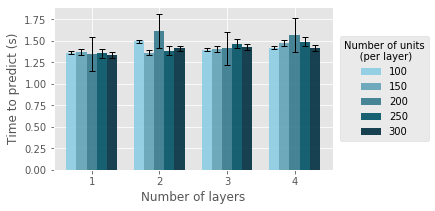

In [6]:
plot(results, 'time_predict', 'Number of layers', 'Time to predict (s)', figsize=(5, 3), cmap='b', legend_pos=(1.362, 0.85))

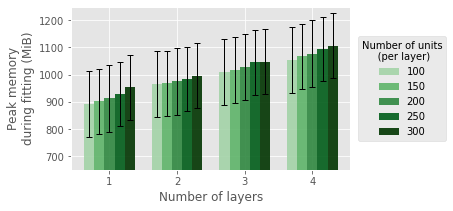

In [7]:
plot(results, 'memory_fit', 'Number of layers', 'Peak memory\nduring fitting (MiB)', ylim=(650, 1250), figsize=(5, 3), cmap='g', legend_pos=(1.362, 0.85))

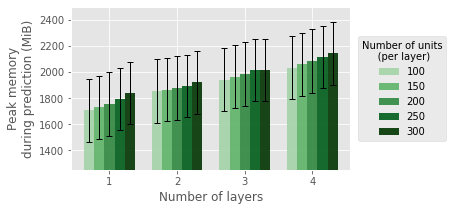

In [8]:
plot(results, 'memory_predict', 'Number of layers', 'Peak memory\nduring prediction (MiB)', ylim=(1250, 2500), figsize=(5, 3), cmap='g', legend_pos=(1.362, 0.85))